In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像并利用canny算子进行边缘提取

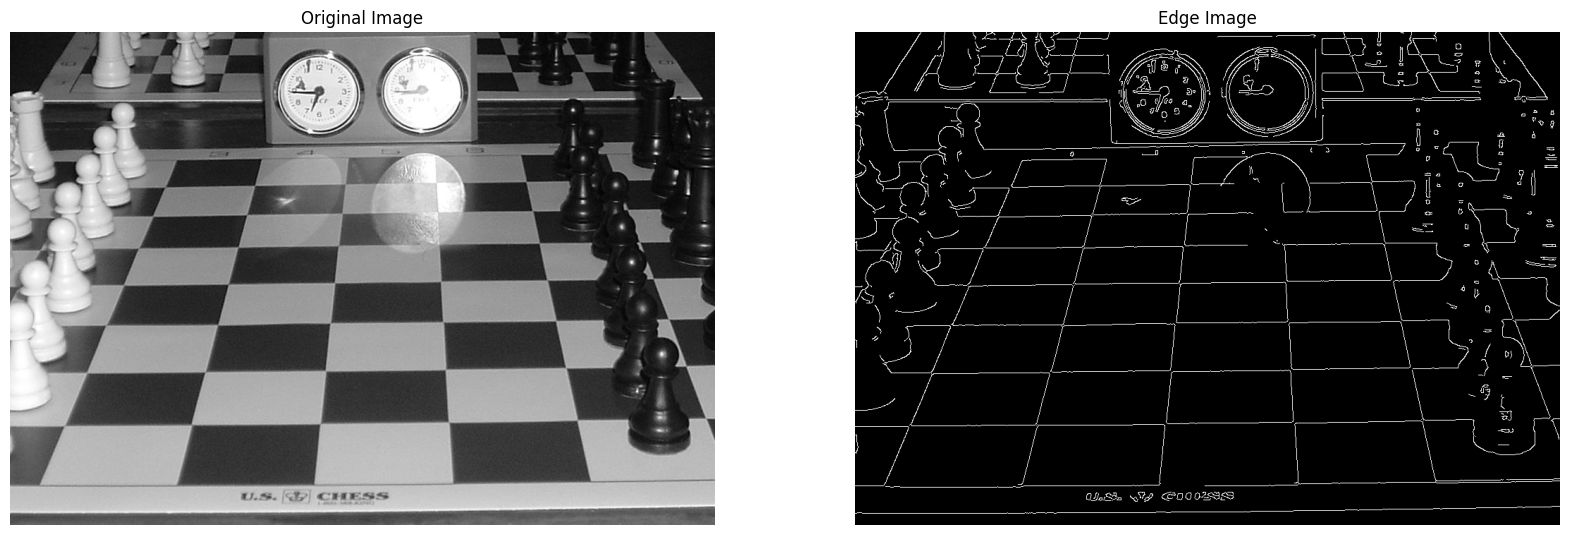

In [88]:
image = cv2.imread('chess.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Canny边缘检测
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=150)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.axis('off')

plt.show()

# 利用霍夫变换检测直线来识别原始图像中的棋盘线

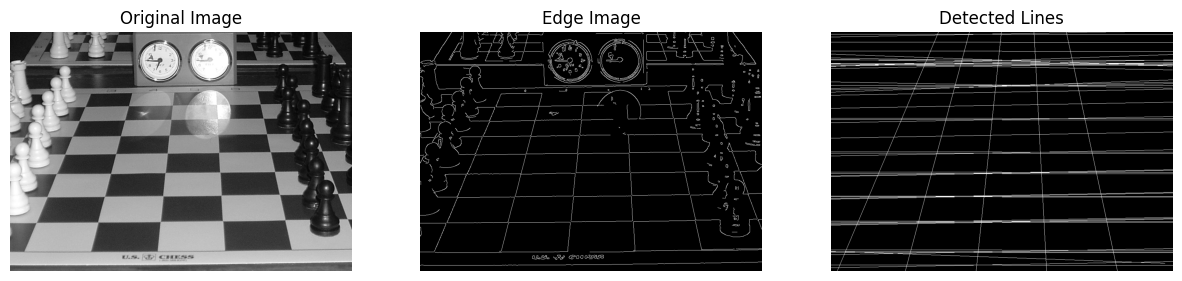

In [89]:
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=135)
line_image = np.zeros(image.shape)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), 1)


# 显示原图、边缘图像和检测到的直线
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(line_image,cmap='gray')
plt.title('Detected Lines')
plt.axis('off')

plt.show()

# 利用霍夫变换检测圆从而识别出钟表

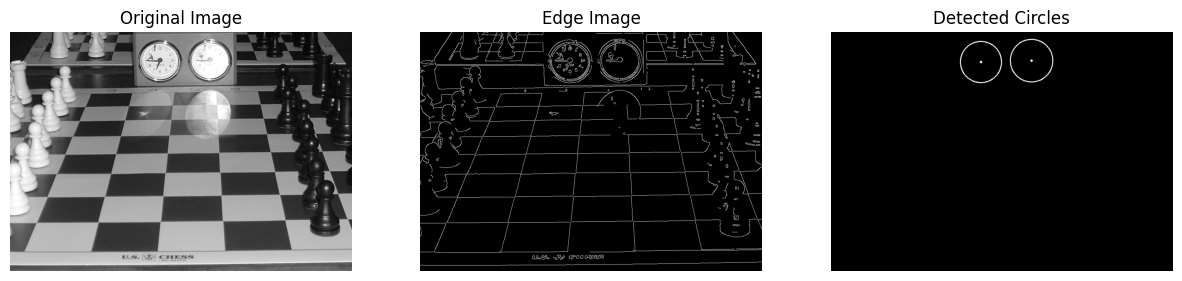

In [90]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=40,
                           param1=50, param2=30, minRadius=50, maxRadius=100)
circle_image = np.zeros(image.shape)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        x,y,r=i[0],i[1],i[2]
        #draw the outer circle
        cv2.circle(circle_image,(x,y),r,(255,255,255),2)
        cv2.circle(circle_image,(x,y),2,(255,255,255),3)

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(circle_image, cmap='gray')
plt.title('Detected Circles')
plt.axis('off')

plt.show()

# 将描绘出来的棋盘线和钟表在原图中勾勒出来

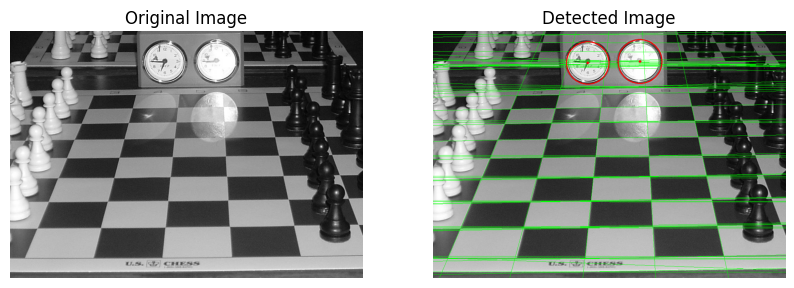

In [91]:
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
image_copy = image_color.copy()

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 1)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        x,y,r=i[0],i[1],i[2]
        #draw the outer circle
        cv2.circle(image_copy,(x,y),r,(255,0,0),2)
        cv2.circle(image_copy,(x,y),2,(255,0,0),3)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(image_color, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_copy, cmap='gray')
plt.title('Detected Image')
plt.axis('off')

plt.show()